# Osnovna kvantna vezja

Namen tega dokumenta je kratek uvod v programiranje z qiskit. Prikazali bomo kako naredimo Bellovo stanje in ga vizualiziramo. 
Potem bomo predstavili delovanje simulatorja kvantnih vezij OpenQASM, ki simulira dejansko proces v kvantnem racunalniku s ponavljanjem 
meritev in modeli za šum.

Osnovni element je QuantumCircuit in naredimo primer za 2 kubita.

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

Sedaj lahko dodajamo vrata in manipuliramo z registri. Naredili bomo primer iz predavanj, kjer ustvarimo Bellovo stanje 
s pomočjo Hadammarjevih in CNOT vrat. 

Vezja lahko vizualiziramo z  Qiskit QuantumCircuit.draw(), ki jo nariše v standardni obliki.

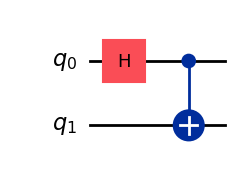

In [4]:
# QuantumCircuit(2) ustvari 2 kubitno vezje (prvi argument) in možne klasične bite (2 argument). Slednjih trenutno ni.
qc = QuantumCircuit(2)

# Dodaj Hadarmmarjeva vrata na bit 1
qc.h(0)
 
# Izvrednoti CNOT na kubitu 1, s kontrolnim kubitom 0
qc.cx(0, 1)
 
# Nariši. Ce odstranimo "mpl" argument dobimo tekstovno sliko
qc.draw("mpl")

# Simulacije vezij

Za simulacijo vezij bomo uporabili modul quant_info. Ta simulator vrne kvantno stanje kot kompleksni vektor z dimenzijo Hilbertovega prostora.

Najprej nastavimo začetno stanje in potem propagiramo stanje s pomočjo vezja.

In [5]:
from qiskit.quantum_info import Statevector

# Nastavi začetno stanje na |00> 
state = Statevector.from_int(0, 2**2)

#izpisimo stanje
state.draw('latex')

<IPython.core.display.Latex object>

In [6]:
# Razvij stanje s kvantnim vezjem
state = state.evolve(qc)

#izpisimo stanje
state.draw('latex')

<IPython.core.display.Latex object>

Stanja lahko tudi narišemo ali z generalizacijo Blochove sfere [dodatna informacija o relativni fazi je v barvi]

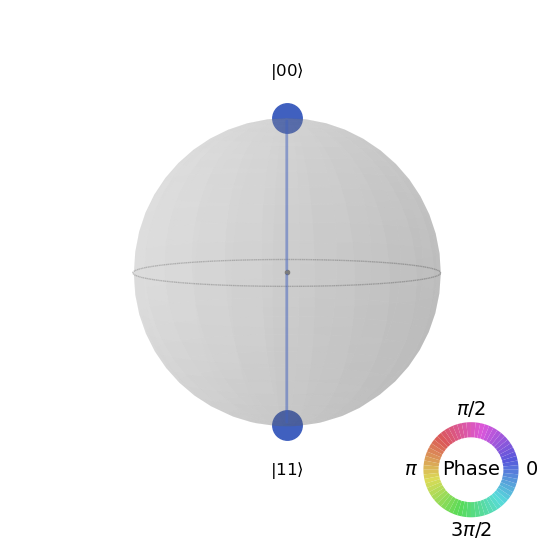

In [7]:
state.draw('qsphere')

ali z matrično reprezentacijo

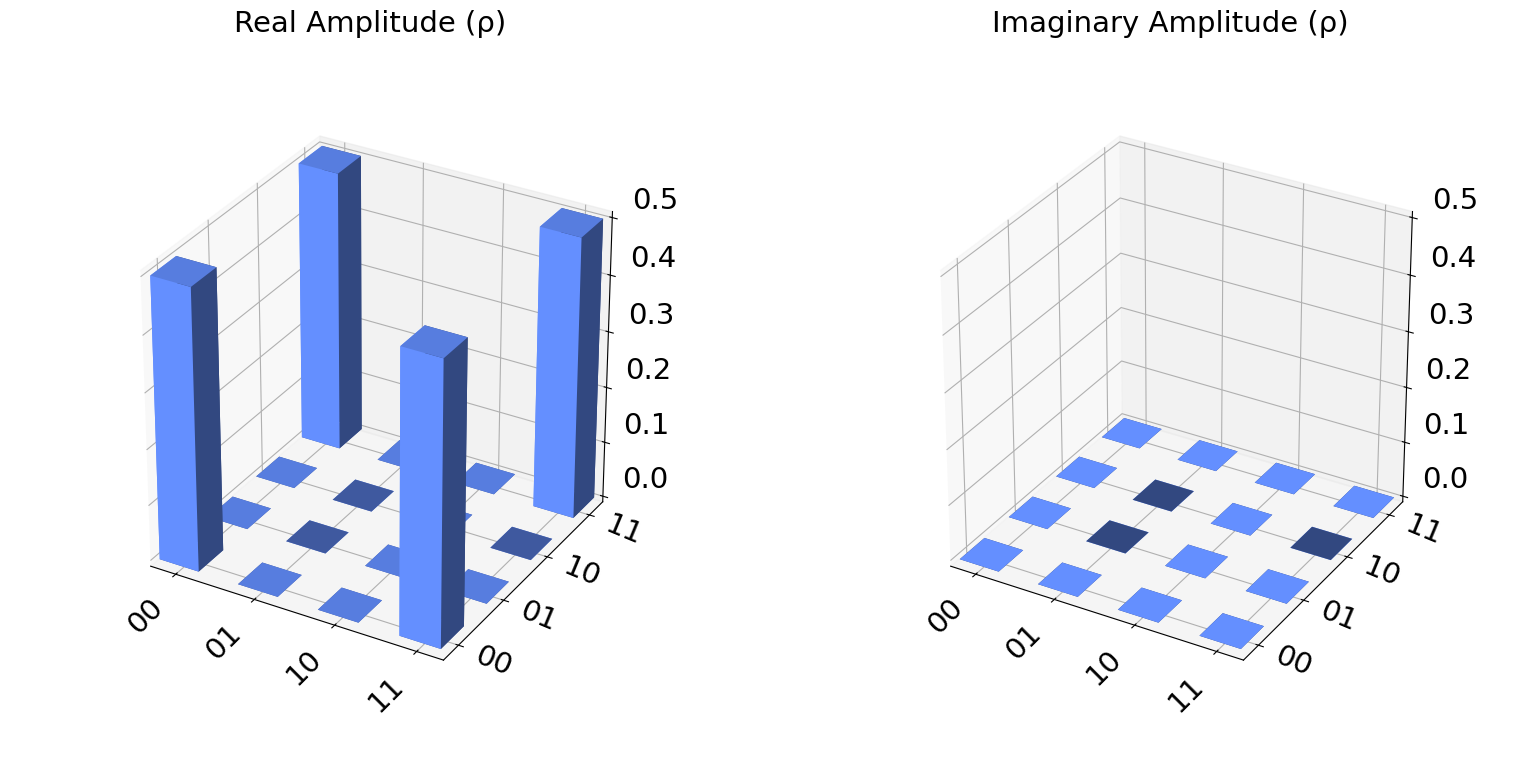

In [6]:
from qiskit.visualization import plot_state_city
plot_state_city(state)
# state.draw('hinton')

Vsako vezje lahko predstavimo z operacijo unitarnega operatorja in funkcija  Operator nam ustvari njegovo matrično reprezentacijo

In [8]:
from qiskit.quantum_info import Operator
import pprint

U = Operator(qc)
# Show the results
matprint(U.data)

0.707107+0j   0.707107+0j         0+0j          0+0j  
       0+0j          0+0j  0.707107+0j  -0.707107+0j  
       0+0j          0+0j  0.707107+0j   0.707107+0j  
0.707107+0j  -0.707107+0j         0+0j          0+0j  


# Simulatorji kvantnih vezij -  OpenQASM

 Realni eksperiment se konča z merjenjem vsakega qubita v računski bazi.
 Brez meritve ne dobimo informacije o stanje in meritev kolapsira stanje v klasični kubit.

 Ustvarimo vezje z dvema kubitoma in dvema klasičnima bitoma in preverimo kaksne so meritve za Bellovo stanje.

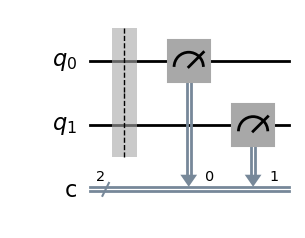

In [9]:
measure=QuantumCircuit(2,2)
 
measure.barrier(range(2))
measure.measure(range(2),range(2))
measure.draw("mpl")

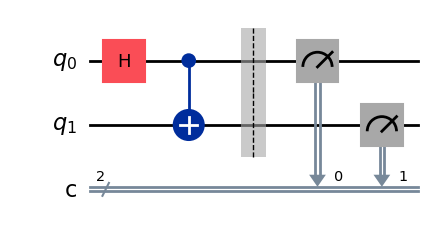

In [10]:
# Zdruzimo obe vezji
# Meritev pride prvo in front=True, kjer compose zdruzi obe vezji
qc_tot = measure.compose(qc, range(2), front=True)

#drawing the circuit
qc_tot.draw('mpl')

 Zadnji del vsebuje uporabo simulatorja AerSimulator, kjer bomo naredili statistiko cez veliko ponovitev

In [11]:
from qiskit import transpile 
from qiskit_aer import AerSimulator

backend = AerSimulator()

# Prvo prevedemo celotno vezje v low-level instrukcije za simulator
qc_compiled = transpile(qc_tot, backend)

# Izvrednotimo vezje in naredimo 2048 ponovitev
job_sim = backend.run(qc_compiled, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()

{'00': 1025, '11': 1023}


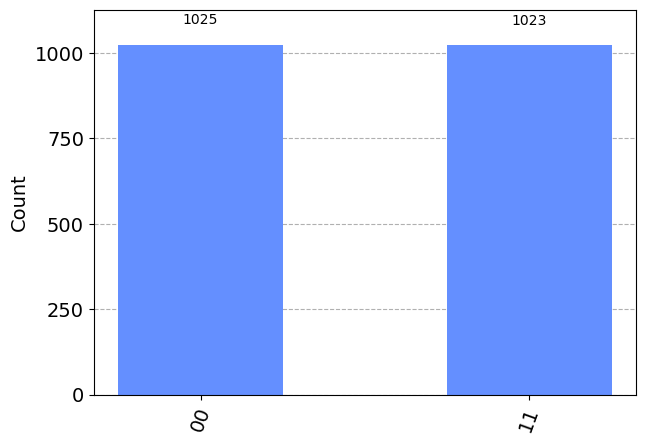

In [12]:
from qiskit.visualization import plot_histogram

counts = result_sim.get_counts(qc_compiled)
print(counts)

plot_histogram(counts)

# Dodatni tutorial je dosegljiv na qiskit 
https://github.com/Qiskit/qiskit-tutorials/tree/2fc7ed53fcc7bb3bff4855e400d00ee050a82b81